# PANDAS TUTORIAL (QUICK TOUR-10 MINUTES)

This is a short introduction to `pandas`, geared mainly for new users.

Customarily, we import as follow:

In [1]:
import numpy as np
import pandas as pd

## Object Creation

Creating a **Series** by passing a list of values, letting `pandas` create a default integer index.

In [2]:
s = pd.Series([1, 2, -7, 10, np.nan, 8, 11])
s

0     1.0
1     2.0
2    -7.0
3    10.0
4     NaN
5     8.0
6    11.0
dtype: float64

Creating a **DataFrame** by passing a `NumPy` array, with datetime index and labeled columns.

In [3]:
dates = pd.date_range("20220319", periods=7)
dates

DatetimeIndex(['2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(7, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2022-03-19,-1.299912,1.056522,-1.076645,0.466803
2022-03-20,2.247550,1.768945,2.341640,-0.397978
2022-03-21,-0.097541,-1.231248,-1.128851,1.201296
2022-03-22,0.113084,-1.615147,-1.426360,-1.542553
2022-03-23,-0.281581,-1.005752,0.425680,-0.536633
2022-03-24,0.335880,-0.216900,-1.314780,1.476533
2022-03-25,0.094517,-1.106857,0.803023,-0.085245


Create a **DataFrame** by passing a *dictionary* of objects that can be converted into a series-like structure.

In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.5,
        "B": pd.Timestamp("20220319"),
        "C": pd.Series(1, index=list(range(4)), dtype=np.float32),
        "D": np.array([5] * 4, dtype=np.int32),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.5,2022-03-19,1.0,5,test,foo
1,1.5,2022-03-19,1.0,5,train,foo
2,1.5,2022-03-19,1.0,5,test,foo
3,1.5,2022-03-19,1.0,5,train,foo


The columns of the resulting **DataFrame** have different `dtypes`.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data

Here is how to view the top and bottom rows of the frame.

In [7]:
df.head()

,A,B,C,D
2022-03-19,-1.299912,1.056522,-1.076645,0.466803
2022-03-20,2.247550,1.768945,2.341640,-0.397978
2022-03-21,-0.097541,-1.231248,-1.128851,1.201296
2022-03-22,0.113084,-1.615147,-1.426360,-1.542553
2022-03-23,-0.281581,-1.005752,0.425680,-0.536633


In [8]:
df.tail()

,A,B,C,D
2022-03-21,-0.097541,-1.231248,-1.128851,1.201296
2022-03-22,0.113084,-1.615147,-1.426360,-1.542553
2022-03-23,-0.281581,-1.005752,0.425680,-0.536633
2022-03-24,0.335880,-0.216900,-1.314780,1.476533
2022-03-25,0.094517,-1.106857,0.803023,-0.085245


> You can pass arguments to the `head()` or `tail()` functions to display a specified number of rows.

In [9]:
df.head(2)

,A,B,C,D
2022-03-19,-1.299912,1.056522,-1.076645,0.466803
2022-03-20,2.247550,1.768945,2.341640,-0.397978


Display the index, columns.

In [10]:
df.index

DatetimeIndex(['2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

> `DataFrame.to_numpy()` gives a `NumPy` representation of the underlying data. Note that this can be an expensive operation when your `DataFrame` has columns with *different* data types, which comes down to a fundamental difference between pandas and `NumPy`: `NumPy` arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call `DataFrame.to_numpy()`, pandas will find the `NumPy` dtype that can hold all of the dtypes in the `DataFrame`. This may end up being object, which requires casting every value to a Python object.

For `df`, our **DataFrame** of all floating-point values, `DataFrame.to_numpy()` is fast and doesn't require copying data

In [12]:
df.to_numpy()

array([[-1.29991182,  1.05652237, -1.07664479,  0.46680348],
       [ 2.24754951,  1.76894483,  2.34164033, -0.3979778 ],
       [-0.0975406 , -1.23124752, -1.12885146,  1.20129552],
       [ 0.11308365, -1.61514685, -1.42636034, -1.54255323],
       [-0.28158075, -1.00575157,  0.4256803 , -0.53663316],
       [ 0.33588024, -0.21689986, -1.31478007,  1.4765326 ],
       [ 0.09451741, -1.10685727,  0.80302258, -0.08524493]])

For `df2`, the **DataFrame** with multiply `dtypes`, `DataFrame.to_numpy()` is relative expensive.

In [13]:
df2.to_numpy()

array([[1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'test', 'foo'],
       [1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'train', 'foo'],
       [1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'test', 'foo'],
       [1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'train', 'foo']],
      dtype=object)

`describe()` shows a quick statistic summary of your data.

In [14]:
df.describe()

,A,B,C,D
count,7.000000,7.000000,7.000000,7.000000
mean,0.158857,-0.335777,-0.196613,0.083175
std,1.063637,1.282223,1.428014,1.050860
min,-1.299912,-1.615147,-1.426360,-1.542553
25%,-0.189561,-1.169052,-1.221816,-0.467305
50%,0.094517,-1.005752,-1.076645,-0.085245
75%,0.224482,0.419811,0.614351,0.834050
max,2.247550,1.768945,2.341640,1.476533


In [15]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.5,1.0,5.0
std,0.0,0.0,0.0
min,1.5,1.0,5.0
25%,1.5,1.0,5.0
50%,1.5,1.0,5.0
75%,1.5,1.0,5.0
max,1.5,1.0,5.0


Transposing your data.

In [16]:
df.T

,2022-03-19,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25
A,-1.299912,2.247550,-0.097541,0.113084,-0.281581,0.335880,0.094517
B,1.056522,1.768945,-1.231248,-1.615147,-1.005752,-0.216900,-1.106857
C,-1.076645,2.341640,-1.128851,-1.426360,0.425680,-1.314780,0.803023
D,0.466803,-0.397978,1.201296,-1.542553,-0.536633,1.476533,-0.085245


Sorting by an **axis**

In [17]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2022-03-25,0.094517,-1.106857,0.803023,-0.085245
2022-03-24,0.335880,-0.216900,-1.314780,1.476533
2022-03-23,-0.281581,-1.005752,0.425680,-0.536633
2022-03-22,0.113084,-1.615147,-1.426360,-1.542553
2022-03-21,-0.097541,-1.231248,-1.128851,1.201296
2022-03-20,2.247550,1.768945,2.341640,-0.397978
2022-03-19,-1.299912,1.056522,-1.076645,0.466803


In [18]:
df.sort_index(axis=1, ascending=False)


,D,C,B,A
2022-03-19,0.466803,-1.076645,1.056522,-1.299912
2022-03-20,-0.397978,2.341640,1.768945,2.247550
2022-03-21,1.201296,-1.128851,-1.231248,-0.097541
2022-03-22,-1.542553,-1.426360,-1.615147,0.113084
2022-03-23,-0.536633,0.425680,-1.005752,-0.281581
2022-03-24,1.476533,-1.314780,-0.216900,0.335880
2022-03-25,-0.085245,0.803023,-1.106857,0.094517


Sorting by values.

In [19]:
df.sort_values(by="B")

,A,B,C,D
2022-03-22,0.113084,-1.615147,-1.426360,-1.542553
2022-03-21,-0.097541,-1.231248,-1.128851,1.201296
2022-03-25,0.094517,-1.106857,0.803023,-0.085245
2022-03-23,-0.281581,-1.005752,0.425680,-0.536633
2022-03-24,0.335880,-0.216900,-1.314780,1.476533
2022-03-19,-1.299912,1.056522,-1.076645,0.466803
2022-03-20,2.247550,1.768945,2.341640,-0.397978


## Selection

### Getting

Selecting a single column, which yeild a `Series`, equivalent to `df.A`.

In [20]:
print("df.A", df.A, sep="\n")
print("="*30)
print("df[\"A\"]", df["A"], sep="\n")

df.A
2022-03-19   -1.299912
2022-03-20    2.247550
2022-03-21   -0.097541
2022-03-22    0.113084
2022-03-23   -0.281581
2022-03-24    0.335880
2022-03-25    0.094517
Freq: D, Name: A, dtype: float64
df["A"]
2022-03-19   -1.299912
2022-03-20    2.247550
2022-03-21   -0.097541
2022-03-22    0.113084
2022-03-23   -0.281581
2022-03-24    0.335880
2022-03-25    0.094517
Freq: D, Name: A, dtype: float64


Selecting via `[]`, which slicing the rows.

In [21]:
df[0:3]

,A,B,C,D
2022-03-19,-1.299912,1.056522,-1.076645,0.466803
2022-03-20,2.247550,1.768945,2.341640,-0.397978
2022-03-21,-0.097541,-1.231248,-1.128851,1.201296


In [22]:
df["20220319":"20220321"]

,A,B,C,D
2022-03-19,-1.299912,1.056522,-1.076645,0.466803
2022-03-20,2.247550,1.768945,2.341640,-0.397978
2022-03-21,-0.097541,-1.231248,-1.128851,1.201296


## Selection by label

For getting a cross section using a label.

In [23]:
df.loc[dates[0]]

A   -1.299912
B    1.056522
C   -1.076645
D    0.466803
Name: 2022-03-19 00:00:00, dtype: float64

Selecting on a multi-axis by label.

In [24]:
df.loc[:, ["A", "B"]]

,A,B
2022-03-19,-1.299912,1.056522
2022-03-20,2.247550,1.768945
2022-03-21,-0.097541,-1.231248
2022-03-22,0.113084,-1.615147
2022-03-23,-0.281581,-1.005752
2022-03-24,0.335880,-0.216900
2022-03-25,0.094517,-1.106857


Showing label slicing, both endpoints are included.

In [25]:
df.loc["20220319":"20220321", ["C", "D"]]

,C,D
2022-03-19,-1.076645,0.466803
2022-03-20,2.341640,-0.397978
2022-03-21,-1.128851,1.201296


Reduction in the dimensions of returned object.

In [26]:
df.loc["20220324", ["B", "C"]]

B   -0.21690
C   -1.31478
Name: 2022-03-24 00:00:00, dtype: float64

For getting a scalar value.

In [27]:
df.loc[dates[1], "A"]

2.2475495110971644

For getting fast access to a scalar (equivalent to the prior method).

In [28]:
df.at[dates[1], "A"]

2.2475495110971644

## Selection by position

Select via the position of the passed integers.

In [29]:
df.iloc[3]
# equivalent to df.loc[dates[3]]

A    0.113084
B   -1.615147
C   -1.426360
D   -1.542553
Name: 2022-03-22 00:00:00, dtype: float64

By integer slices, acting similar to `Numpy/Python`.

In [30]:
df.iloc[3:5, 0:2]
# equivalent to df.loc["20220322":"20220323", ["A", "B"]]

,A,B
2022-03-22,0.113084,-1.615147
2022-03-23,-0.281581,-1.005752


By list of integer position locations, similar to the `Numpy/Python` style.

In [31]:
df.iloc[[1, 2, 4], [0, 2]]
# equivalent to df.loc["20220320":"20220323", ["B", "C"]]

,A,C
2022-03-20,2.247550,2.341640
2022-03-21,-0.097541,-1.128851
2022-03-23,-0.281581,0.425680


For slicing rows explicitly.

In [32]:
df.iloc[1:3, :]

,A,B,C,D
2022-03-20,2.247550,1.768945,2.341640,-0.397978
2022-03-21,-0.097541,-1.231248,-1.128851,1.201296


For slicing columns explicitly.

In [33]:
df.iloc[:, 1:3]

,B,C
2022-03-19,1.056522,-1.076645
2022-03-20,1.768945,2.341640
2022-03-21,-1.231248,-1.128851
2022-03-22,-1.615147,-1.426360
2022-03-23,-1.005752,0.425680
2022-03-24,-0.216900,-1.314780
2022-03-25,-1.106857,0.803023


For getting a value explicitly.

In [34]:
df.iloc[1, 1]

1.7689448270483046

For getting fast access to a scalar (equivalent to the prior method).

In [35]:
df.iat[1, 1]

1.7689448270483046

## Boolean indexing

Using a single column's values to select data.

In [36]:
df[df["A"] > 0]

,A,B,C,D
2022-03-20,2.247550,1.768945,2.341640,-0.397978
2022-03-22,0.113084,-1.615147,-1.426360,-1.542553
2022-03-24,0.335880,-0.216900,-1.314780,1.476533
2022-03-25,0.094517,-1.106857,0.803023,-0.085245


Selecting values from a **DataFrame** where a boolean condition is met.

In [37]:
df[df > 0]

,A,B,C,D
2022-03-19,NaN,1.056522,NaN,0.466803
2022-03-20,2.247550,1.768945,2.341640,NaN
2022-03-21,NaN,NaN,NaN,1.201296
2022-03-22,0.113084,NaN,NaN,NaN
2022-03-23,NaN,NaN,0.425680,NaN
2022-03-24,0.335880,NaN,NaN,1.476533
2022-03-25,0.094517,NaN,0.803023,NaN


Using `isin()` method for filtering.

In [38]:
df_copy = df.copy()
df_copy["E"] = ["one", "two", "three", "four", "five", "six", "seven"]
df_copy

,A,B,C,D,E
2022-03-19,-1.299912,1.056522,-1.076645,0.466803,one
2022-03-20,2.247550,1.768945,2.341640,-0.397978,two
2022-03-21,-0.097541,-1.231248,-1.128851,1.201296,three
2022-03-22,0.113084,-1.615147,-1.426360,-1.542553,four
2022-03-23,-0.281581,-1.005752,0.425680,-0.536633,five
2022-03-24,0.335880,-0.216900,-1.314780,1.476533,six
2022-03-25,0.094517,-1.106857,0.803023,-0.085245,seven


In [39]:
df_copy[df_copy["E"].isin(["three", "six"])]

,A,B,C,D,E
2022-03-21,-0.097541,-1.231248,-1.128851,1.201296,three
2022-03-24,0.335880,-0.216900,-1.314780,1.476533,six


## Setting

Setting a new column automatically aligns the data by the indexes.

In [40]:
s1 = pd.Series(list(range(1, 8)), index=pd.date_range("20220319", periods=7))
s1

2022-03-19    1
2022-03-20    2
2022-03-21    3
2022-03-22    4
2022-03-23    5
2022-03-24    6
2022-03-25    7
Freq: D, dtype: int64

In [41]:
df["F"] = s1
df

,A,B,C,D,F
2022-03-19,-1.299912,1.056522,-1.076645,0.466803,1
2022-03-20,2.247550,1.768945,2.341640,-0.397978,2
2022-03-21,-0.097541,-1.231248,-1.128851,1.201296,3
2022-03-22,0.113084,-1.615147,-1.426360,-1.542553,4
2022-03-23,-0.281581,-1.005752,0.425680,-0.536633,5
2022-03-24,0.335880,-0.216900,-1.314780,1.476533,6
2022-03-25,0.094517,-1.106857,0.803023,-0.085245,7


Setting values by label.

In [42]:
df.at[dates[0], "A"] = 0
df

,A,B,C,D,F
2022-03-19,0.000000,1.056522,-1.076645,0.466803,1
2022-03-20,2.247550,1.768945,2.341640,-0.397978,2
2022-03-21,-0.097541,-1.231248,-1.128851,1.201296,3
2022-03-22,0.113084,-1.615147,-1.426360,-1.542553,4
2022-03-23,-0.281581,-1.005752,0.425680,-0.536633,5
2022-03-24,0.335880,-0.216900,-1.314780,1.476533,6
2022-03-25,0.094517,-1.106857,0.803023,-0.085245,7


Setting values by position.

In [43]:
df.iat[0, 1] = 1
df

,A,B,C,D,F
2022-03-19,0.000000,1.000000,-1.076645,0.466803,1
2022-03-20,2.247550,1.768945,2.341640,-0.397978,2
2022-03-21,-0.097541,-1.231248,-1.128851,1.201296,3
2022-03-22,0.113084,-1.615147,-1.426360,-1.542553,4
2022-03-23,-0.281581,-1.005752,0.425680,-0.536633,5
2022-03-24,0.335880,-0.216900,-1.314780,1.476533,6
2022-03-25,0.094517,-1.106857,0.803023,-0.085245,7


Setting by assigning with a `Numpy` array

In [44]:
df.loc[:, "D"] = np.array(5 * len(df))
df

,A,B,C,D,F
2022-03-19,0.000000,1.000000,-1.076645,35,1
2022-03-20,2.247550,1.768945,2.341640,35,2
2022-03-21,-0.097541,-1.231248,-1.128851,35,3
2022-03-22,0.113084,-1.615147,-1.426360,35,4
2022-03-23,-0.281581,-1.005752,0.425680,35,5
2022-03-24,0.335880,-0.216900,-1.314780,35,6
2022-03-25,0.094517,-1.106857,0.803023,35,7


## Missing data

`Pandas` primarily uses the value `np.nan` to represent missing data. It is by default not included in computation.

Reindexing allows you to change/add/delete the index on a sepecified axis. This returns a copy of data.

In [45]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0]:dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2022-03-19,0.000000,1.000000,-1.076645,35,1,1.0
2022-03-20,2.247550,1.768945,2.341640,35,2,1.0
2022-03-21,-0.097541,-1.231248,-1.128851,35,3,NaN
2022-03-22,0.113084,-1.615147,-1.426360,35,4,NaN


To drop any rows that have missing data.

In [46]:
df1.dropna(how="any")

,A,B,C,D,F,E
2022-03-19,0.00000,1.000000,-1.076645,35,1,1.0
2022-03-20,2.24755,1.768945,2.341640,35,2,1.0


Filling missing data.

In [47]:
df1.fillna(value=3)

,A,B,C,D,F,E
2022-03-19,0.000000,1.000000,-1.076645,35,1,1.0
2022-03-20,2.247550,1.768945,2.341640,35,2,1.0
2022-03-21,-0.097541,-1.231248,-1.128851,35,3,3.0
2022-03-22,0.113084,-1.615147,-1.426360,35,4,3.0


To get the boolean mask where values are `nan`.

In [48]:
pd.isna(df1)

,A,B,C,D,F,E
2022-03-19,False,False,False,False,False,False
2022-03-20,False,False,False,False,False,False
2022-03-21,False,False,False,False,False,True
2022-03-22,False,False,False,False,False,True


## Operations

### Stats

Operations in general *exclude* missing data.

Perform a descriptive statistic.

In [49]:
df.mean()

A     0.344558
B    -0.343851
C    -0.196613
D    35.000000
F     4.000000
dtype: float64

Same operation on the other axis.

In [50]:
df.mean(1)

2022-03-19    7.184671
2022-03-20    8.671627
2022-03-21    7.108472
2022-03-22    7.214315
2022-03-23    7.827670
2022-03-24    7.960840
2022-03-25    8.358137
Freq: D, dtype: float64

Operation with objects that have different dismensionality and need alignment. In addition, `pandas` automatically broadcast along the specified dimension.

In [51]:
s = pd.Series([1, 3, 5, np.nan, 6, 8, 11], index=dates).shift(2)
s

2022-03-19    NaN
2022-03-20    NaN
2022-03-21    1.0
2022-03-22    3.0
2022-03-23    5.0
2022-03-24    NaN
2022-03-25    6.0
Freq: D, dtype: float64

In [52]:
df.sub(s, axis="index")

,A,B,C,D,F
2022-03-19,NaN,NaN,NaN,NaN,NaN
2022-03-20,NaN,NaN,NaN,NaN,NaN
2022-03-21,-1.097541,-2.231248,-2.128851,34.0,2.0
2022-03-22,-2.886916,-4.615147,-4.426360,32.0,1.0
2022-03-23,-5.281581,-6.005752,-4.574320,30.0,0.0
2022-03-24,NaN,NaN,NaN,NaN,NaN
2022-03-25,-5.905483,-7.106857,-5.196977,29.0,1.0


### Apply

Applying functions to the data.

In [53]:
df

,A,B,C,D,F
2022-03-19,0.000000,1.000000,-1.076645,35,1
2022-03-20,2.247550,1.768945,2.341640,35,2
2022-03-21,-0.097541,-1.231248,-1.128851,35,3
2022-03-22,0.113084,-1.615147,-1.426360,35,4
2022-03-23,-0.281581,-1.005752,0.425680,35,5
2022-03-24,0.335880,-0.216900,-1.314780,35,6
2022-03-25,0.094517,-1.106857,0.803023,35,7


In [54]:
df.apply(np.cumsum)
# equivalent to df.apply(np.cumsum, axis=0)

,A,B,C,D,F
2022-03-19,0.000000,1.000000,-1.076645,35,1
2022-03-20,2.247550,2.768945,1.264996,70,3
2022-03-21,2.150009,1.537697,0.136144,105,6
2022-03-22,2.263093,-0.077450,-1.290216,140,10
2022-03-23,1.981512,-1.083201,-0.864536,175,15
2022-03-24,2.317392,-1.300101,-2.179316,210,21
2022-03-25,2.411909,-2.406958,-1.376293,245,28


In [55]:
df.apply(np.cumsum, axis=1)

,A,B,C,D,F
2022-03-19,0.000000,1.000000,-0.076645,34.923355,35.923355
2022-03-20,2.247550,4.016494,6.358135,41.358135,43.358135
2022-03-21,-0.097541,-1.328788,-2.457640,32.542360,35.542360
2022-03-22,0.113084,-1.502063,-2.928424,32.071576,36.071576
2022-03-23,-0.281581,-1.287332,-0.861652,34.138348,39.138348
2022-03-24,0.335880,0.118980,-1.195800,33.804200,39.804200
2022-03-25,0.094517,-1.012340,-0.209317,34.790683,41.790683


In [56]:
df.apply(lambda x: x.max() - x.min())

A    2.529130
B    3.384092
C    3.768001
D    0.000000
F    6.000000
dtype: float64

In [57]:
df.apply(lambda x: x.max() - x.min(), axis=1)

2022-03-19    36.076645
2022-03-20    33.231055
2022-03-21    36.231248
2022-03-22    36.615147
2022-03-23    36.005752
2022-03-24    36.314780
2022-03-25    36.106857
Freq: D, dtype: float64

### Histogramming

In [58]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    5
2    2
3    0
4    5
5    1
6    2
7    4
8    3
9    3
dtype: int32

In [59]:
s.value_counts()

4    2
5    2
2    2
3    2
0    1
1    1
dtype: int64

### String methods

Series is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in `str` generally uses **regular expressions** by default (and in some cases always uses them).

In [60]:
s = pd.Series(["A", "B", "C", "D", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s

0       A
1       B
2       C
3       D
4    Aaba
5    Baca
6     NaN
7    CABA
8     dog
9     cat
dtype: object

In [61]:
s.str.lower()

0       a
1       b
2       c
3       d
4    aaba
5    baca
6     NaN
7    caba
8     dog
9     cat
dtype: object

### Merge

#### Concat

`Pandas` provides various facilities for easily combining together `Series` and `DataFrame` objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join/merge-type operations.

Concatenating pandas objects together with `concat()`.

In [62]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.608874,-0.295739,1.042462,-0.144377
1,-1.122242,-0.117644,0.415494,2.089991
2,0.331973,0.764023,-0.855869,-0.019506
3,0.948393,-0.200770,1.019016,-0.431637
4,-0.128560,-0.051102,-0.459288,-0.094672
5,0.154880,1.022545,-0.270891,0.358761
6,-0.095041,0.351336,-0.417210,-0.594708
7,-1.508503,0.232908,-1.905934,-1.272292
8,0.171530,-0.103335,0.321266,-0.516655
9,-0.769405,-1.191565,0.494300,-0.825565


In [63]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.608874 -0.295739  1.042462 -0.144377
 1 -1.122242 -0.117644  0.415494  2.089991
 2  0.331973  0.764023 -0.855869 -0.019506,
           0         1         2         3
 3  0.948393 -0.200770  1.019016 -0.431637
 4 -0.128560 -0.051102 -0.459288 -0.094672
 5  0.154880  1.022545 -0.270891  0.358761
 6 -0.095041  0.351336 -0.417210 -0.594708,
           0         1         2         3
 7 -1.508503  0.232908 -1.905934 -1.272292
 8  0.171530 -0.103335  0.321266 -0.516655
 9 -0.769405 -1.191565  0.494300 -0.825565]

In [64]:
pd.concat(pieces)

,0,1,2,3
0,0.608874,-0.295739,1.042462,-0.144377
1,-1.122242,-0.117644,0.415494,2.089991
2,0.331973,0.764023,-0.855869,-0.019506
3,0.948393,-0.200770,1.019016,-0.431637
4,-0.128560,-0.051102,-0.459288,-0.094672
5,0.154880,1.022545,-0.270891,0.358761
6,-0.095041,0.351336,-0.417210,-0.594708
7,-1.508503,0.232908,-1.905934,-1.272292
8,0.171530,-0.103335,0.321266,-0.516655
9,-0.769405,-1.191565,0.494300,-0.825565


> Adding a column to a `DataFrame` is relatively fast. However, adding a row requires a copy, and may be expensive. I recommend passing a pre-built list of records to the `DataFrame` constructor instead of building a `DataFrame` by iteratively appending records to it.

### Join

SQL style merges.

In [65]:
left = pd.DataFrame(
    {
        "keys": ["foo", "bar"],
        "lval": [1, 2]
    }
)
right = pd.DataFrame(
    {
        "keys": ["foo", "bar"],
        "rval": [4, 5]
    }
)

In [66]:
left

,keys,lval
0,foo,1
1,bar,2


In [67]:
right

,keys,rval
0,foo,4
1,bar,5


In [68]:
pd.merge(left, right, on="keys")

,keys,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By "grouping" we are refering to a process involving one ore more of the following steps:

- **Splitting** the data into groups based on some criteria.
- **Applying** a function to each group independently
- **Combining** the results into a data structure

In [69]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,0.185108,0.448642
1,bar,one,0.356552,-0.057975
2,foo,two,1.064241,-0.315436
3,bar,three,-0.336938,-1.813477
4,foo,two,-0.447772,-0.821081
5,bar,two,0.120010,-1.558723
6,foo,one,-0.208676,0.067615
7,foo,three,1.851218,-0.542687


Grouping and then applying the `sum()` function to the resulting group.

In [70]:
df.groupby("A").sum()

,C,D
A,,
bar,0.139624,-3.430175
foo,2.444120,-1.162947


Grouping by multiple columns forms a hierarchical index, and again we can apply the `sum()` function.

In [71]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.356552 -0.057975
    three -0.336938 -1.813477
    two    0.120010 -1.558723
foo one   -0.023567  0.516257
    three  1.851218 -0.542687
    two    0.616469 -1.136517

## Reshaping

### Stack

In [72]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one     0.889171 -0.216110
      two    -0.365090  0.512332
baz   one     0.877687 -0.475296
      two    -1.204370  0.268744
foo   one    -1.150758 -1.381399
      two    -2.431595  0.652907
qux   one     0.176582 -0.129757
      two    -1.450637 -1.267461

The `stack()` method "compress" a level in the **DataFrame's** columns.

In [73]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.889171 -0.216110
      two    -0.365090  0.512332
baz   one     0.877687 -0.475296
      two    -1.204370  0.268744

In [74]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.889171
               B   -0.216110
       two     A   -0.365090
               B    0.512332
baz    one     A    0.877687
               B   -0.475296
       two     A   -1.204370
               B    0.268744
dtype: float64

With a "stacked" DataFrame or Series (having a `MultiIndex` as the `Index`), the inverse operation of `stack()` is `unstack()`, which by default unstacks the **last level**.

In [75]:
stacked.unstack()

A         B
first second                    
bar   one     0.889171 -0.216110
      two    -0.365090  0.512332
baz   one     0.877687 -0.475296
      two    -1.204370  0.268744

In [76]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.889171 -0.365090
      B -0.216110  0.512332
baz   A  0.877687 -1.204370
      B -0.475296  0.268744

In [77]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.889171  0.877687
       B -0.216110 -0.475296
two    A -0.365090 -1.204370
       B  0.512332  0.268744

## Pivot tables

In [78]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

df

,A,B,C,D,E
0,one,A,foo,0.418111,-0.172354
1,one,B,foo,0.813615,-0.387821
2,two,C,foo,-1.181350,-0.562904
3,three,A,bar,0.202245,-0.989492
4,one,B,bar,1.258790,-0.761319
5,one,C,bar,-0.668076,-0.391269
6,two,A,foo,1.047215,-0.184055
7,three,B,foo,-0.614525,-0.799499
8,one,C,foo,0.855003,-1.361845
9,one,A,bar,1.239553,1.156581


We can produce pivot tables from this data very easily.

In [79]:
pd.pivot_table(df, values="D", index=["A", "B"], columns="C")

C             bar       foo
A     B                    
one   A  1.239553  0.418111
      B  1.258790  0.813615
      C -0.668076  0.855003
three A  0.202245       NaN
      B       NaN -0.614525
      C  0.567421       NaN
two   A       NaN  1.047215
      B  1.050113       NaN
      C       NaN -1.181350

## Time series

`Pandas` has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

In [80]:
rng = pd.date_range("1/1/2022", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2022-01-01 00:00:00    474
2022-01-01 00:00:01     98
2022-01-01 00:00:02    335
2022-01-01 00:00:03    418
2022-01-01 00:00:04    197
                      ... 
2022-01-01 00:01:35    147
2022-01-01 00:01:36    432
2022-01-01 00:01:37    249
2022-01-01 00:01:38    461
2022-01-01 00:01:39    253
Freq: S, Length: 100, dtype: int32

In [81]:
ts.resample("5Min").sum()

2022-01-01    25745
Freq: 5T, dtype: int32

Time zone representation

In [82]:
rng = pd.date_range("1/1/2022 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2022-01-01    2.701669
2022-01-02   -0.687032
2022-01-03   -0.277675
2022-01-04    0.654908
2022-01-05    0.895077
Freq: D, dtype: float64

In [83]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2022-01-01 00:00:00+00:00    2.701669
2022-01-02 00:00:00+00:00   -0.687032
2022-01-03 00:00:00+00:00   -0.277675
2022-01-04 00:00:00+00:00    0.654908
2022-01-05 00:00:00+00:00    0.895077
Freq: D, dtype: float64

Converting to another time zone.

In [84]:
ts_utc.tz_convert("US/Eastern")

2021-12-31 19:00:00-05:00    2.701669
2022-01-01 19:00:00-05:00   -0.687032
2022-01-02 19:00:00-05:00   -0.277675
2022-01-03 19:00:00-05:00    0.654908
2022-01-04 19:00:00-05:00    0.895077
Freq: D, dtype: float64

Converting between time span representations.

In [85]:
rng = pd.date_range("1/1/2022", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2022-01-31    0.399960
2022-02-28    0.571664
2022-03-31    0.518811
2022-04-30   -0.362813
2022-05-31   -1.017430
Freq: M, dtype: float64

In [86]:
ps = ts.to_period()
ps

2022-01    0.399960
2022-02    0.571664
2022-03    0.518811
2022-04   -0.362813
2022-05   -1.017430
Freq: M, dtype: float64

In [87]:
ps.to_timestamp()

2022-01-01    0.399960
2022-02-01    0.571664
2022-03-01    0.518811
2022-04-01   -0.362813
2022-05-01   -1.017430
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenients arithmetic functions to be used. In the following example, I convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end.

In [88]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00    1.802292
1990-06-01 09:00    0.212232
1990-09-01 09:00    0.884692
1990-12-01 09:00   -0.282546
1991-03-01 09:00   -1.770092
Freq: H, dtype: float64

## Categoricals

`Pandas` can include categorical data in a **DataFrame**.

In [89]:
df = pd.DataFrame(
    {
        "id": list(range(1, 7, 1)),
        "raw_grade": ["a", "a", "b", "a", "a", "e"],
    }
)

Converting the grades to a categorical data type.

In [90]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    a
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to `Series.cat.categories()` is in place!).

In [91]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1    very good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

Reorder the categories and simultaneously add the missing categories (methods under `Series.cat()` return a new `Series` by default).

In [92]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1    very good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting in per order in the categories, not lexical order.

In [93]:
df.sort_values(by="grade", ascending=False)

,id,raw_grade,grade
0,1,a,very good
1,2,a,very good
3,4,a,very good
4,5,a,very good
2,3,b,good
5,6,e,very bad


Grouping by a categorical column also shows empty categories.

In [94]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         1
very good    4
dtype: int64

## Plotting

We use the standard convention for referencing the matplotlib API.

In [95]:
import matplotlib.pyplot as plt
plt.close("all")

The `close()` method is used to close a figure window.

<AxesSubplot:>

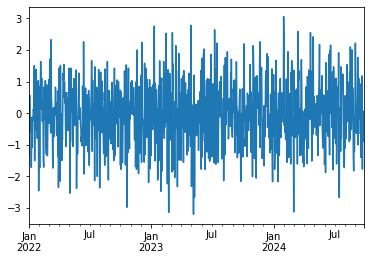

In [96]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2022", periods=1000))
ts.plot()

<AxesSubplot:>

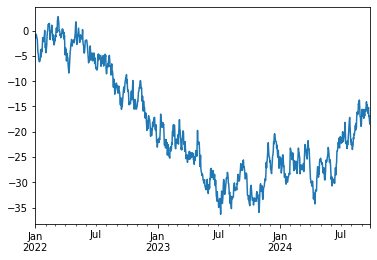

In [97]:
ts_cumsum = ts.cumsum()
ts_cumsum.plot()

If running under Jupyter Notebook, the plot will appear on `plot()`. Otherwise use `matplotlib.pyplot.show` to show it of `matplotlin.pyplot.savefig` to write it into a file.

In [98]:
plt.show()

On a DataFrame, the `plot()` method is a convenience to plot all of the columns with labels.

<Figure size 432x288 with 0 Axes>

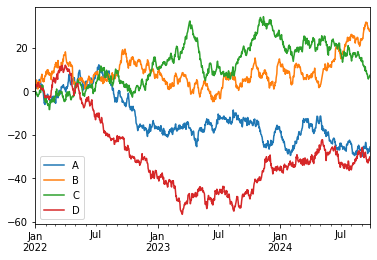

In [99]:
df = pd.DataFrame(
    np.random.randn(1000, 4),
    index=ts.index,
    columns=list("ABCD")
)
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc="best")

## Getting data in/out

### CSV

#### Writing to a .csv file

In [100]:
df.to_csv("./docs/files/foo.csv")

#### Reading from a .csv file

In [101]:
pd.read_csv("./docs/files/foo.csv")

,Unnamed: 0,A,B,C,D
0,2022-01-01,0.790720,-0.353675,-0.477799,1.454128
1,2022-01-02,1.535089,1.273300,-0.026764,2.186900
2,2022-01-03,1.224990,2.772115,-1.294031,3.007405
3,2022-01-04,2.105619,4.508436,-0.546866,2.336596
4,2022-01-05,1.948965,5.182532,-0.658983,2.189739
...,...,...,...,...,...
995,2024-09-22,-27.906008,28.937707,6.170702,-32.130133
996,2024-09-23,-27.525671,28.108515,6.328505,-31.120501
997,2024-09-24,-26.977391,27.749624,6.681421,-31.446031
998,2024-09-25,-26.328504,27.514338,7.162062,-30.109583


### HDF5

Reading and writing to HDF5Stores.

#### Writing to a HDF5 Store.

In [102]:
df.to_hdf("./docs/files/foo.h5", "df")

#### Reading from HDF5 Store.

In [103]:
pd.read_hdf("./docs/files/foo.h5", "df")

,A,B,C,D
2022-01-01,0.790720,-0.353675,-0.477799,1.454128
2022-01-02,1.535089,1.273300,-0.026764,2.186900
2022-01-03,1.224990,2.772115,-1.294031,3.007405
2022-01-04,2.105619,4.508436,-0.546866,2.336596
2022-01-05,1.948965,5.182532,-0.658983,2.189739
...,...,...,...,...
2024-09-22,-27.906008,28.937707,6.170702,-32.130133
2024-09-23,-27.525671,28.108515,6.328505,-31.120501
2024-09-24,-26.977391,27.749624,6.681421,-31.446031
2024-09-25,-26.328504,27.514338,7.162062,-30.109583


### Excel

Reading and writing to MS Excel.

#### Writing to an excel file

In [104]:
df.to_excel("./docs/files/foo.xlsx", sheet_name="Sheet1")

#### Reading from an excel file.

In [105]:
pd.read_excel("./docs/files/foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2022-01-01,0.790720,-0.353675,-0.477799,1.454128
1,2022-01-02,1.535089,1.273300,-0.026764,2.186900
2,2022-01-03,1.224990,2.772115,-1.294031,3.007405
3,2022-01-04,2.105619,4.508436,-0.546866,2.336596
4,2022-01-05,1.948965,5.182532,-0.658983,2.189739
...,...,...,...,...,...
995,2024-09-22,-27.906008,28.937707,6.170702,-32.130133
996,2024-09-23,-27.525671,28.108515,6.328505,-31.120501
997,2024-09-24,-26.977391,27.749624,6.681421,-31.446031
998,2024-09-25,-26.328504,27.514338,7.162062,-30.109583
